In [17]:
from keras.datasets import mnist
import numpy as np
#загружаем базу картинок MNIST
(x_train_src, _), (x_test_src, _) = mnist.load_data()

#Нормализуем данные
x_train = x_train_src.astype('float32') / 255.
x_test = x_test_src.astype('float32') / 255.
#Преобразуем к формату (28, 28, 1) (Длинна, ширина, канал)
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test  = np.reshape(x_test,  (len(x_test),  28, 28, 1))

In [15]:
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
import tensorflow as tf
# Количество неронов в скрытом слое энкодера
encoding_dim = 30
# Энкодер
input_img = Input(shape=(28, 28, 1))
# Выравниваем входной векстор в одномерный
flat_img = Flatten()(input_img)
# Кодированное полносвязным слоем представление
encoded = Dense(encoding_dim, activation='relu')(flat_img)

# Декодер
# Раскодированное другим полносвязным слоем изображение
input_encoded = Input(shape=(encoding_dim,))
flat_decoded = Dense(28*28, activation='sigmoid')(input_encoded)
# Разворачиваем одномерный вектор в трёхмерный
decoded = Reshape((28, 28, 1))(flat_decoded)

# Собираем модель
encoder = Model(input_img, encoded, name="encoder")
decoder = Model(input_encoded, decoded, name="decoder")
autoencoder = Model(input_img, decoder(encoder(input_img)), name="autoencoder")
autoencoder.compile(optimizer=Adam(lr=0.003), loss='binary_crossentropy')


1.13.2


In [14]:
autoencoder.fit(x_train, x_train,
                epochs=40,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/40
60000/60000 [==============================] - 4s 61us/sample - loss: 54.6099 - val_loss: 37.3221

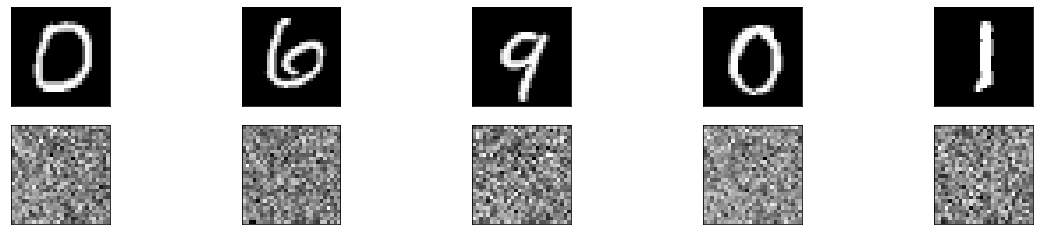

In [16]:
decoded_imgs = autoencoder.predict(x_test)

decoded_imgs = decoded_imgs.reshape(x_test_src.shape)

import matplotlib.pyplot as plt
def plotImage(data, plt, n, i, row = 0):
    ax = plt.subplot(2, n, i + 1 + row * n)
    plt.imshow(data[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
def plotImages(data1, data2, n):
  plt.figure(figsize=(20, 4))
  for i in range(n):
    plotImage(data1, plt, n, i, 0)
    plotImage(data2, plt, n, i, 1)
  plt.show()
plotImages(x_test_src[10:199], decoded_imgs[10:199], 5)

